#### Import necessary modules

In [1]:
from msa import Structure, Element, Node, Material, Section
import numpy as np

 #### Initialize structural model

In [2]:
struct = Structure()

#### Define material properties

In [3]:
mat= Material(
        id=1,
        E=500,    
        nu=0.3,
    )
struct.add_material(mat) # add material to structure

#### Define cross-section properties

In [4]:
r = 0.5
section = Section(
        id=1,
        A=np.pi * r ** 2.0,   
        Iy=np.pi * r ** 4.0 / 4.0,
        Iz=np.pi * r ** 4.0 / 4.0,
        Ir=np.pi * r ** 4.0 / 2.0,
        J=np.pi * r ** 4.0 / 2.0,
    )
struct.add_section(section)

#### Create nodes

In [5]:
# Fixed nodes
node1 = Node(id=1, x=0, y=0, z=0)
node1.fixed_dofs = [True]*6 
struct.add_node(node1)
    
node2 = Node(id=2, x=10, y=0, z=0)
node2.fixed_dofs = [True]*6 
struct.add_node(node2)

node3 = Node(id=3, x=10, y=20, z=0)
node3.fixed_dofs = [True]*6 
struct.add_node(node3)

node4 = Node(id=4, x=0, y=20, z=0)
node4.fixed_dofs = [True]*6 
struct.add_node(node4)

# Free nodes
node5 = Node(id=5, x=0, y=0, z=25)
node5.loads = [0,0,-1,0,0,0]
struct.add_node(node5)

node6 = Node(id=6, x=10, y=0, z=25)
node6.loads = [0,0,-1,0,0,0]
struct.add_node(node6)

node7 = Node(id=7, x=10, y=20, z=25)
node7.loads = [0,0,-1,0,0,0]
struct.add_node(node7)

node8 = Node(id=8, x=0, y=20, z=25)
node8.loads = [0,0,-1,0,0,0]
struct.add_node(node8)


#### Create elements

In [6]:
beam_element1= Element(
        id=1,
        node1=struct.nodes[1],
        node2=struct.nodes[5],
        material=mat,
        section=section,
    )
struct.add_element(beam_element1)

beam_element2= Element(
        id=2,
        node1=struct.nodes[2],
        node2=struct.nodes[6],
        material=mat,
        section=section,
    )
struct.add_element(beam_element2)

beam_element3= Element(
        id=3,
        node1=struct.nodes[3],
        node2=struct.nodes[7],
        material=mat,
        section=section,
    )
struct.add_element(beam_element3)

beam_element4= Element(
        id=4,
        node1=struct.nodes[4],
        node2=struct.nodes[8],
        material=mat,
        section=section,
    )
struct.add_element(beam_element4)

beam_element5= Element(
        id=5,
        node1=struct.nodes[5],
        node2=struct.nodes[6],
        material=mat,
        section=section,
    )
struct.add_element(beam_element5)

beam_element6= Element(
        id=6,
        node1=struct.nodes[6],
        node2=struct.nodes[7],
        material=mat,
        section=section,
    )
struct.add_element(beam_element6)

beam_element7= Element(
        id=7,
        node1=struct.nodes[7],
        node2=struct.nodes[8],
        material=mat,
        section=section,
    )
struct.add_element(beam_element7)

beam_element8= Element(
        id=8,
        node1=struct.nodes[8],
        node2=struct.nodes[5],
        material=mat,
        section=section,
    )
struct.add_element(beam_element8)

#### Perform linear analysis

In [7]:
struct.linear_analyze()

#### Compte elastic critical stress

In [8]:
lambda_cr, buckling_mode = struct.compute_elastic_critical_load()
print(f'The celastic ritical load of the sturcture is {lambda_cr} and the buckling shape is:')
print(f'{buckling_mode}')

The celastic ritical load of the sturcture is 0.3072145243028312 and the buckling shape is:
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.41386686e-13 -1.00000000e+00 -9.35060640e-04  2.00258608e-02
 -6.20055378e-15 -2.56990372e-14 -5.41390326e-13 -1.00000000e+00
 -9.35060640e-04  2.00258608e-02 -6.12309392e-15 -2.57381990e-14
 -1.54789553e-14 -1.00000000e+00  9.35060640e-04  2.00258608e-02
 -5.42980564e-16 -2.59917440e-14 -1.56914970e-14 -1.00000000e+00
  9.35060640e-04  2.00258608e-02 -4.68111496e-16 -2.57982126e-14]


#### Plot the initial and deformed shape

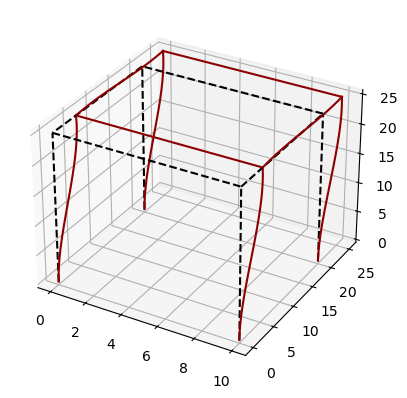

In [9]:
struct.post_processing()

In [10]:
for node in [node5, node6, node7,node8]:
    print(f"Node {node.id}:")
    print(f"  Ux = {node.displacements[0]:.4e} ")
    print(f"  Uy = {node.displacements[1]:.4e} ")
    print(f"  Uz = {node.displacements[2]:.4e} ")
    print(f"  θx = {node.displacements[3]:.4e} ")
    print(f"  θy = {node.displacements[4]:.4e} ")
    print(f"  θz = {node.displacements[5]:.4e} ")

Node 5:
  Ux = 3.5702e-18 
  Uy = 2.1296e-17 
  Uz = -6.3662e-02 
  θx = -7.0291e-19 
  θy = 2.3353e-19 
  θz = -2.5580e-19 
Node 6:
  Ux = 3.5704e-18 
  Uy = 1.8639e-17 
  Uz = -6.3662e-02 
  θx = -1.0131e-18 
  θy = 1.1441e-19 
  θz = -2.5533e-19 
Node 7:
  Ux = 8.7942e-18 
  Uy = 1.8643e-17 
  Uz = -6.3662e-02 
  θx = -1.1372e-18 
  θy = 1.4469e-18 
  θz = -2.5616e-19 
Node 8:
  Ux = 8.7926e-18 
  Uy = 2.1310e-17 
  Uz = -6.3662e-02 
  θx = -8.8833e-19 
  θy = 4.5180e-19 
  θz = -2.5625e-19 
